In [1]:
using Revise
using OrdinaryDiffEq, Sundials, DiffEqDevTools, Plots, ODEInterfaceDiffEq, ODE, LSODA
using Random
Random.seed!(123)
gr()
# 2D Linear ODE
function f(du,u,p,t)
  @inbounds for i in eachindex(u)
    du[i] = 1.01*u[i]
  end
end
function f_analytic(u₀,p,t)
  u₀*exp(1.01*t)
end
tspan = (0.0,10.0)
prob = ODEProblem(ODEFunction(f,analytic=f_analytic),rand(100,100),tspan)

abstols = 1.0 ./ 10.0 .^ (3:13)
reltols = 1.0 ./ 10.0 .^ (0:10);

┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1260


# Testing benchmarks of Explicit Extrapolation Methods

## 1. Defining Work Precision

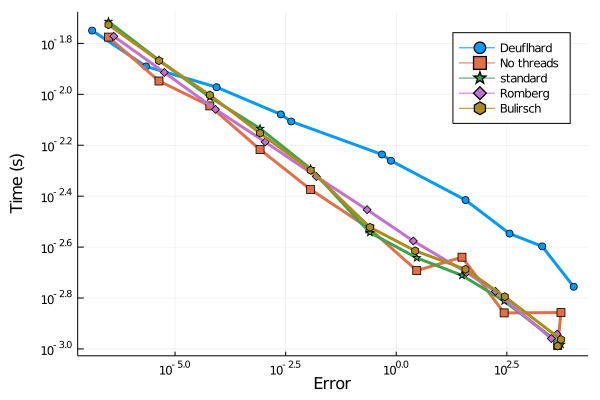

In [8]:
setups = [Dict(:alg=>ExtrapolationMidpointDeuflhard(min_order=1, max_order=9, init_order=9, threading=false))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=false))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=true))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence = :romberg, threading=true))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence = :bulirsch, threading=true))]
solnames = ["Deuflhard","No threads","standard","Romberg","Bulirsch"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)

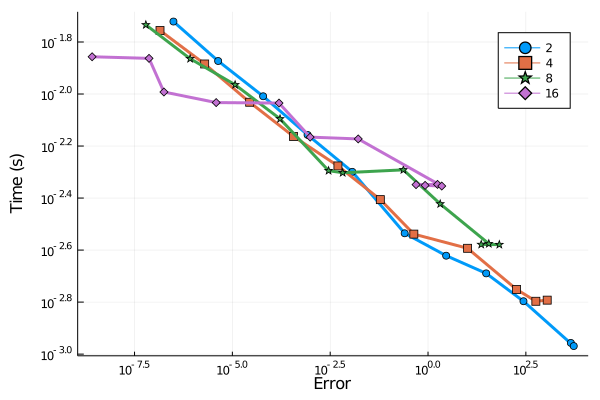

In [9]:
setups = [Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence_factor=2))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence_factor=8))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence_factor=16))]
solnames = ["2","4","8","16"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)

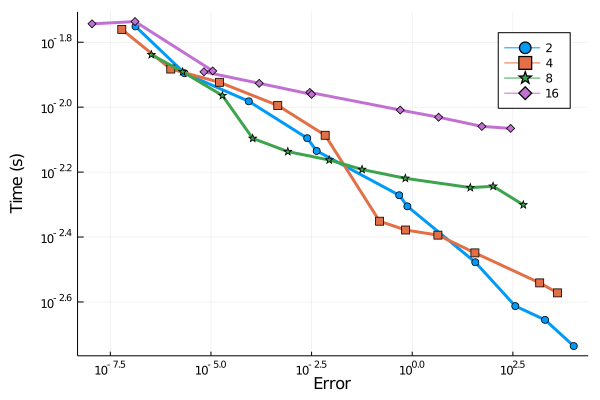

In [12]:
setups = [Dict(:alg=>ExtrapolationMidpointDeuflhard(min_order=1, max_order=9, init_order=9, sequence_factor = 2))
          Dict(:alg=>ExtrapolationMidpointDeuflhard(min_order=1, max_order=9, init_order=9, sequence_factor = 4))
          Dict(:alg=>ExtrapolationMidpointDeuflhard(min_order=1, max_order=9, init_order=9, sequence_factor = 8))
          Dict(:alg=>ExtrapolationMidpointDeuflhard(min_order=1, max_order=9, init_order=9, sequence_factor = 16))]
solnames = ["2","4","8","16"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)

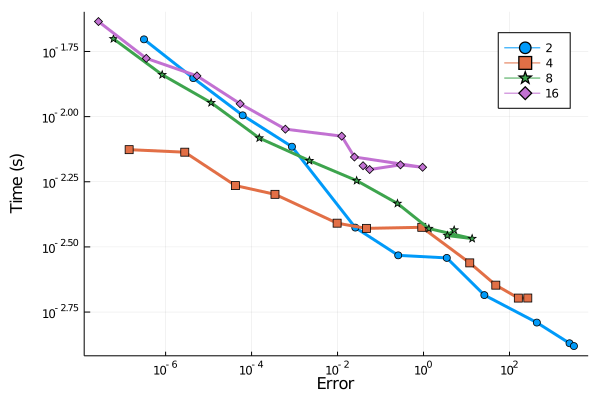

In [13]:
setups = [Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=2))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=8))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=16))]
solnames = ["2","4","8","16"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)